In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn import metrics

In [2]:
path = r"C:\Users\USER\Combined_LeafFruit.csv"
df = pd.read_csv(path)
df = shuffle(df)
df.head()

,Unnamed: 0,contrast_0,homogeneity_0,energy_0,correlation_0,contrast_45,homogeneity_45,energy_45,correlation_45,contrast_90,homogeneity_90,energy_90,correlation_90,contrast_135,homogeneity_135,energy_135,correlation_135,label
138,138,3.058977,5.967705,4.130055,5.560338,0.588502,0.482819,0.538317,0.490224,0.127927,0.107846,0.117632,0.109466,0.880041,0.765588,0.837914,0.781598,Papaya Leaf Ringspot
404,404,3.157154,6.121292,4.606327,5.834064,0.603651,0.503187,0.545516,0.513190,0.144620,0.124628,0.132935,0.126783,0.879300,0.765971,0.824262,0.776957,Papaya Leaf Powdery Mildew
343,343,2.418536,3.597632,2.155116,3.832480,0.647250,0.591895,0.679844,0.591149,0.136699,0.124223,0.143560,0.124525,0.926323,0.890154,0.934243,0.882966,Papaya Leaf Powdery Mildew
458,458,3.574203,4.447720,1.952880,4.843399,0.547713,0.531052,0.645879,0.499841,0.118338,0.114900,0.138751,0.109552,0.860843,0.826662,0.923930,0.811234,Papaya Leaf Curl
552,75,1.286060,2.255686,1.645374,2.297885,0.935398,0.885249,0.914384,0.883708,0.588345,0.557553,0.574458,0.556740,0.928553,0.874816,0.908746,0.872473,Fruit Papaya Ringspot


In [3]:
from sklearn.preprocessing import LabelEncoder
encoders=LabelEncoder()
df['label']=encoders.fit_transform(df['label'])

In [4]:
df.shape

(712, 18)

In [5]:
df.describe()

,Unnamed: 0,contrast_0,homogeneity_0,energy_0,correlation_0,contrast_45,homogeneity_45,energy_45,correlation_45,contrast_90,homogeneity_90,energy_90,correlation_90,contrast_135,homogeneity_135,energy_135,correlation_135,label
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,198.063202,2.335905,3.585027,2.311302,3.615808,0.714520,0.656637,0.713666,0.656157,0.256523,0.241088,0.255577,0.241015,0.914434,0.869125,0.915671,0.868067,5.209270
std,132.225036,1.797870,2.492751,1.694704,2.542469,0.145677,0.154205,0.139131,0.153912,0.177274,0.177703,0.175573,0.177701,0.066230,0.090840,0.062920,0.092638,2.744594
min,0.000000,0.102099,0.159277,0.108854,0.164906,0.403285,0.366300,0.404886,0.361478,0.090747,0.085297,0.090722,0.084634,0.601982,0.498538,0.614299,0.453152,0.000000
25%,88.750000,0.791464,1.487816,0.927750,1.497113,0.596424,0.529337,0.591509,0.524565,0.134209,0.119233,0.133388,0.120212,0.874925,0.805729,0.875287,0.803574,3.000000
50%,177.500000,1.874142,3.073856,1.879787,2.983291,0.699252,0.637624,0.700471,0.637893,0.167371,0.151505,0.169452,0.150900,0.928308,0.886053,0.927974,0.886046,5.000000
75%,298.250000,3.360156,5.339020,3.426850,5.446367,0.853749,0.797472,0.848919,0.797468,0.340155,0.325864,0.342425,0.324657,0.968058,0.947115,0.966573,0.948144,8.000000
max,476.000000,9.636443,12.323122,10.777604,13.264022,0.967749,0.943560,0.965472,0.946456,0.771170,0.765289,0.768739,0.765312,0.996202,0.994072,0.995950,0.993862,9.000000


In [6]:
df = df.rename(columns={'16': 'label'})
X = df.drop('label',axis=1)
y = df['label']

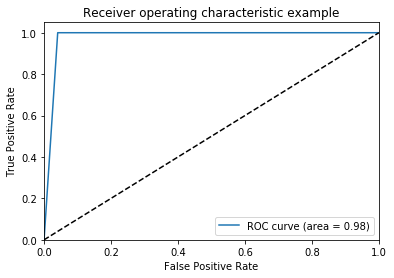

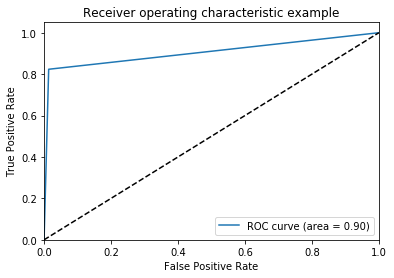

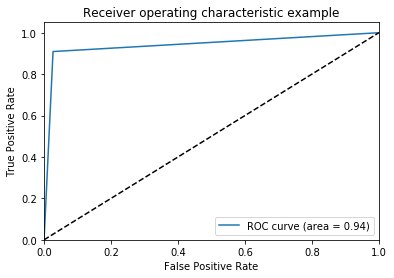

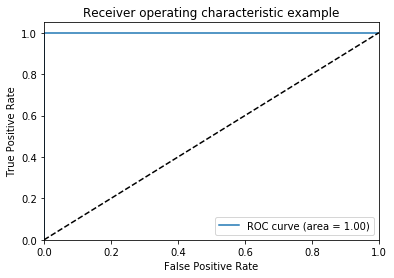

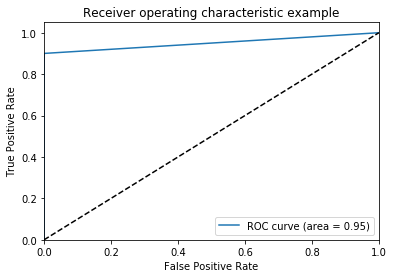

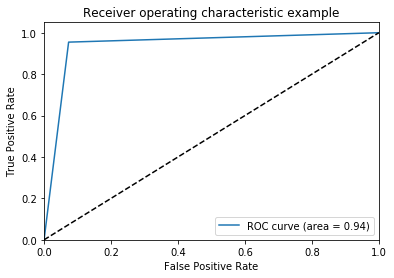

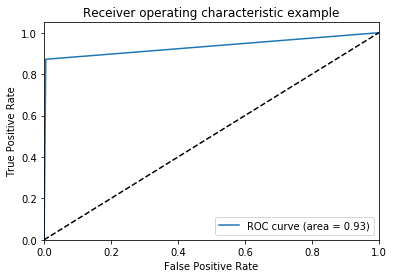

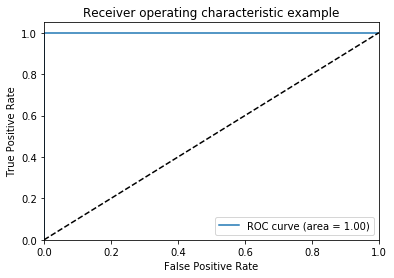

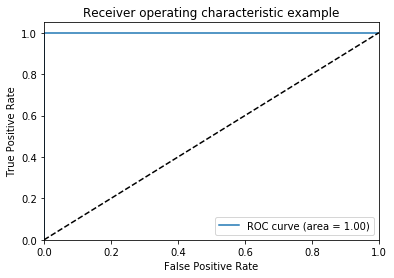

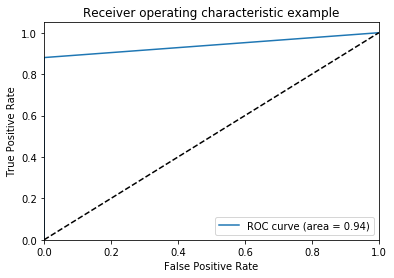

In [8]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier



y = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9])
n_classes = 10

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.33, random_state=0)

# classifier
clf = OneVsRestClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0))
clf.fit(X_train, y_train)
y_score=clf.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 60 to 366
Data columns (total 18 columns):
Unnamed: 0         712 non-null int64
contrast_0         712 non-null float64
homogeneity_0      712 non-null float64
energy_0           712 non-null float64
correlation_0      712 non-null float64
contrast_45        712 non-null float64
homogeneity_45     712 non-null float64
energy_45          712 non-null float64
correlation_45     712 non-null float64
contrast_90        712 non-null float64
homogeneity_90     712 non-null float64
energy_90          712 non-null float64
correlation_90     712 non-null float64
contrast_135       712 non-null float64
homogeneity_135    712 non-null float64
energy_135         712 non-null float64
correlation_135    712 non-null float64
label              712 non-null int32
dtypes: float64(16), int32(1), int64(1)
memory usage: 102.9 KB


Text(0.5, 1, 'Correlation between different fearures')

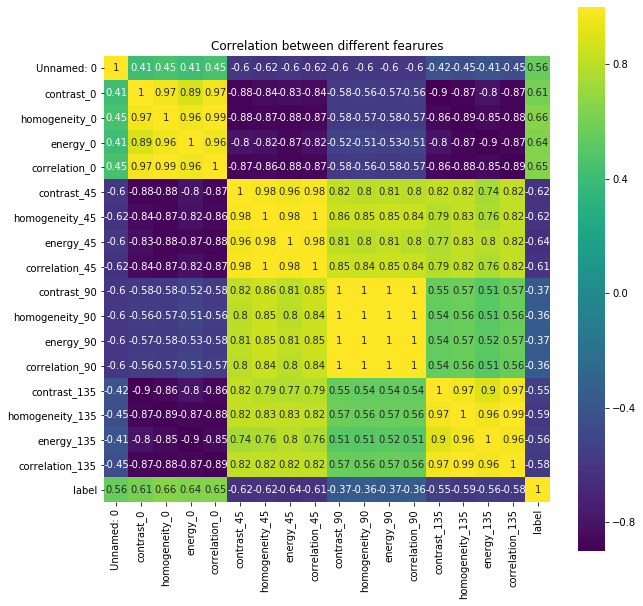

In [24]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In [25]:
X.head()

,Unnamed: 0,contrast_0,homogeneity_0,energy_0,correlation_0,contrast_45,homogeneity_45,energy_45,correlation_45,contrast_90,homogeneity_90,energy_90,correlation_90,contrast_135,homogeneity_135,energy_135,correlation_135
60,60,0.854182,2.318139,2.021936,2.397893,0.899422,0.850815,0.853595,0.844437,0.711037,0.704022,0.706679,0.704193,0.982752,0.953315,0.959173,0.951709
40,40,1.188419,1.842092,1.308931,1.884245,0.828351,0.733368,0.767547,0.730067,0.422234,0.355465,0.369726,0.355197,0.970651,0.954597,0.967670,0.953559
61,61,0.732292,1.864606,1.601869,1.940546,0.912073,0.872598,0.878600,0.870700,0.743573,0.737574,0.740273,0.737373,0.985832,0.964026,0.969009,0.962561
641,164,0.377926,0.700977,0.434712,0.724814,0.890263,0.782380,0.829372,0.779603,0.268835,0.215977,0.235156,0.215419,0.969605,0.943577,0.965019,0.941657
343,343,2.418536,3.597632,2.155116,3.832480,0.647250,0.591895,0.679844,0.591149,0.136699,0.124223,0.143560,0.124525,0.926323,0.890154,0.934243,0.882966


In [26]:
y.head()

60     5
40     5
61     5
641    3
343    8
Name: label, dtype: int32

# Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,MaxAbsScaler
  
scaler = MaxAbsScaler()

X = scaler.fit_transform(X)

X = pd.DataFrame(X)

In [28]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.126050,0.088641,0.188113,0.187605,0.180782,0.929396,0.901708,0.884123,0.892209,0.922023,0.919943,0.919270,0.920138,0.986499,0.959000,0.963073,0.957586
1,0.084034,0.123325,0.149483,0.121449,0.142057,0.855957,0.777235,0.794997,0.771369,0.547523,0.464485,0.480952,0.464120,0.974352,0.960290,0.971605,0.959448
2,0.128151,0.075992,0.151310,0.148629,0.146301,0.942469,0.924793,0.910022,0.919958,0.964214,0.963785,0.962971,0.963494,0.989591,0.969776,0.972949,0.968506
3,0.344538,0.039218,0.056883,0.040335,0.054645,0.919932,0.829179,0.859033,0.823708,0.348607,0.282216,0.305898,0.281479,0.973301,0.949204,0.968943,0.947473
4,0.720588,0.250978,0.291942,0.199962,0.288938,0.668820,0.627300,0.704158,0.624592,0.177261,0.162321,0.186748,0.162712,0.929855,0.895462,0.938042,0.888419


In [29]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(
      X, y , test_size = 0.25, random_state=None)

X_train.shape, X_test.shape


((534, 17), (178, 17))

In [30]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
89,0.575630,0.454979,0.522811,0.365148,0.493352,0.628967,0.580927,0.641430,0.575102,0.182741,0.167120,0.186686,0.167089,0.854035,0.785285,0.869733,0.781980
48,0.144958,0.150725,0.211993,0.163204,0.186288,0.968287,0.942015,0.955947,0.943759,0.784144,0.752828,0.775965,0.756012,0.925381,0.864262,0.908861,0.872106
577,0.283613,0.148436,0.214505,0.177238,0.213332,0.712497,0.645306,0.682152,0.632593,0.189446,0.166763,0.180270,0.164295,0.956482,0.918134,0.940682,0.912136
144,0.355042,0.492350,0.498155,0.267199,0.450640,0.552520,0.525076,0.624675,0.522030,0.150799,0.142532,0.168280,0.141645,0.874637,0.838429,0.925548,0.843019
125,0.867647,0.395638,0.514242,0.449722,0.430249,0.584378,0.513517,0.544815,0.526530,0.178233,0.159862,0.169175,0.162293,0.824522,0.707251,0.775962,0.737119


# Model training

## KNN

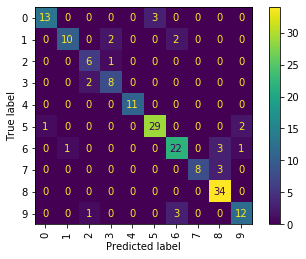

In [31]:
# Remember that we are trying to come up
# with a model to predict whether
# someone will TARGET CLASS or not.
# We'll start with k = 1.

from sklearn.neighbors import KNeighborsClassifier
  
knn = KNeighborsClassifier(n_neighbors = 1)
  
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

plot_confusion_matrix(knn, X_test, y_test)
plt.xticks(rotation = 90)
plt.show()

# Predictions and Evaluations
# Let's evaluate our KNN model ! 


In [32]:
from sklearn.metrics import classification_report  
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.91      0.71      0.80        14
           2       0.67      0.86      0.75         7
           3       0.73      0.80      0.76        10
           4       1.00      1.00      1.00        11
           5       0.91      0.91      0.91        32
           6       0.81      0.81      0.81        27
           7       1.00      0.73      0.84        11
           8       0.85      1.00      0.92        34
           9       0.80      0.75      0.77        16

    accuracy                           0.86       178
   macro avg       0.86      0.84      0.84       178
weighted avg       0.87      0.86      0.86       178



In [33]:
from sklearn import metrics
error_rate = []
scores = []

k=50
max_accuracy=0
best_k=1

for i in range(1, k):
      
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    y_predict = knn.predict(X_test)
    curr_accuracy=metrics.accuracy_score(y_test,y_predict)
    if curr_accuracy>max_accuracy:
        max_accuracy=curr_accuracy
        best_k=i
    scores.append(curr_accuracy)
  


Text(0, 0.5, 'Error Rate')

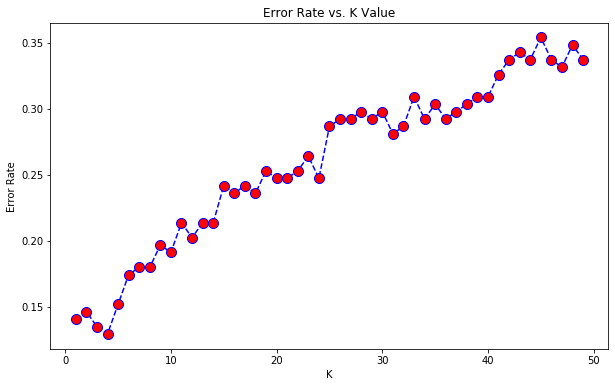

In [34]:
plt.figure(figsize =(10, 6))
plt.plot(range(1, k), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Accuracy')

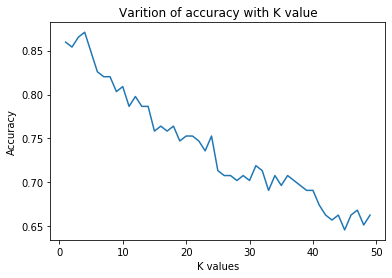

In [35]:
plt.plot(np.arange(1,k),scores)
plt.title('Varition of accuracy with K value')
plt.xlabel('K values')
plt.ylabel('Accuracy')

In [36]:
knn = KNeighborsClassifier(n_neighbors = best_k)
  
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report  
print(classification_report(y_test, pred))

print("Accuracy for k = {} is {}%".format(best_k,max_accuracy*100))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       1.00      0.86      0.92        14
           2       0.64      1.00      0.78         7
           3       0.78      0.70      0.74        10
           4       1.00      1.00      1.00        11
           5       0.91      0.91      0.91        32
           6       0.83      0.93      0.88        27
           7       0.80      0.73      0.76        11
           8       0.91      0.88      0.90        34
           9       0.80      0.75      0.77        16

    accuracy                           0.87       178
   macro avg       0.86      0.86      0.86       178
weighted avg       0.88      0.87      0.87       178

Accuracy for k = 4 is 87.07865168539325%


## SVM

In [56]:
from sklearn.svm import SVC
svm_model= SVC(probability=True)
tuned_parameters = {
 'C': (np.arange(1,30)) , 'kernel': ['linear'],
 'C': (np.arange(1,30)) ,  'kernel': ['rbf'],
 'C':(np.arange(1,30)) , 'kernel':['poly']
                   }
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

model_svm.fit(X_train,y_train)
print('best hyperlink parameters')
print(model_svm.best_params_)
y_pred= model_svm.predict(X_test)
print('Accuracy Score:')

print(classification_report(y_test, y_pred))
#metrics.plot_roc_curve(model_svm, X_test, y_test)  

best hyperlink parameters
{'C': 19, 'kernel': 'poly'}
Accuracy Score:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14
           2       0.70      1.00      0.82         7
           3       1.00      0.70      0.82        10
           4       1.00      0.91      0.95        11
           5       0.94      1.00      0.97        32
           6       0.96      0.96      0.96        27
           7       1.00      1.00      1.00        11
           8       0.97      0.97      0.97        34
           9       1.00      0.94      0.97        16

    accuracy                           0.96       178
   macro avg       0.95      0.94      0.94       178
weighted avg       0.96      0.96      0.96       178



In [38]:
print('Model accuracy score: {0:0.4f}%'. format(accuracy_score(y_pred,y_test)*100))

Model accuracy score: 95.5056%


## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=200,criterion="gini")
forest.fit(X_train,y_train)
pred_f=forest.predict(X_test)
print(classification_report(y_test,pred_f))
print("Accuracy:",metrics.accuracy_score(y_test, pred_f))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        16
           1       1.00      0.93      0.96        14
           2       0.86      0.86      0.86         7
           3       0.77      1.00      0.87        10
           4       1.00      1.00      1.00        11
           5       0.91      0.94      0.92        32
           6       0.96      1.00      0.98        27
           7       1.00      1.00      1.00        11
           8       1.00      0.97      0.99        34
           9       0.88      0.94      0.91        16

    accuracy                           0.94       178
   macro avg       0.94      0.94      0.93       178
weighted avg       0.95      0.94      0.94       178

Accuracy: 0.9438202247191011


## Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB,CategoricalNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.48      0.94      0.64        16
           1       0.65      0.93      0.76        14
           2       0.75      0.86      0.80         7
           3       0.62      0.50      0.56        10
           4       1.00      0.91      0.95        11
           5       0.63      0.38      0.47        32
           6       0.84      0.78      0.81        27
           7       0.90      0.82      0.86        11
           8       0.90      0.79      0.84        34
           9       0.76      0.81      0.79        16

    accuracy                           0.74       178
   macro avg       0.75      0.77      0.75       178
weighted avg       0.76      0.74      0.73       178



In [41]:
print('Model accuracy score: {0:0.4f}%'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score: 73.5955%


## Logistic regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

lr = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=1000))

# fit the model
lr.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.48      0.94      0.64        16
           1       0.65      0.93      0.76        14
           2       0.75      0.86      0.80         7
           3       0.62      0.50      0.56        10
           4       1.00      0.91      0.95        11
           5       0.63      0.38      0.47        32
           6       0.84      0.78      0.81        27
           7       0.90      0.82      0.86        11
           8       0.90      0.79      0.84        34
           9       0.76      0.81      0.79        16

    accuracy                           0.74       178
   macro avg       0.75      0.77      0.75       178
weighted avg       0.76      0.74      0.73       178



In [60]:
fpr = dict()
n_classes = 10
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

ValueError: Can only tuple-index with a MultiIndex

In [43]:
print('Model accuracy score: {0:0.4f}%'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score: 73.5955%


## Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)
DT_Score=accuracy_score(y_test, y_pred)*100
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.88      0.50      0.64        14
           2       0.00      0.00      0.00         7
           3       0.62      1.00      0.77        10
           4       0.00      0.00      0.00        11
           5       0.50      1.00      0.67        32
           6       0.87      0.96      0.91        27
           7       0.92      1.00      0.96        11
           8       1.00      0.97      0.99        34
           9       1.00      0.94      0.97        16

    accuracy                           0.75       178
   macro avg       0.58      0.64      0.59       178
weighted avg       0.66      0.75      0.69       178



C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
print('Model accuracy score: {0:0.4f}%'. format(DT_Score))

Model accuracy score: 75.2809%


# K-Fold Cross Validation

In [46]:
from sklearn.model_selection import KFold, StratifiedKFold

kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1


Fold:1, Train set: 534, Test set:178
Fold:2, Train set: 534, Test set:178
Fold:3, Train set: 534, Test set:178
Fold:4, Train set: 534, Test set:178


In [47]:
score = cross_val_score(lr, X, y, cv= kf, scoring="accuracy")
print('Scores for each fold are:')
print(score)
print('Model accuracy score for Logistic Regression: {0:0.4f}%'.format(score.mean()*100))

Scores for each fold are:
[0.58988764 0.65730337 0.52247191 0.66292135]
Model accuracy score for Logistic Regression: 60.8146%


In [48]:
score = cross_val_score(gnb, X, y, cv= kf, scoring="accuracy")
print('Scores for each fold are:')
print(score)
print('Model accuracy score for Gaussian Naive Bayes: {0:0.4f}%'.format(score.mean()*100))

Scores for each fold are:
[0.75842697 0.76966292 0.69101124 0.74719101]
Model accuracy score for Gaussian Naive Bayes: 74.1573%


In [49]:
y_test

193    9
516    0
46     5
532    4
340    8
      ..
150    9
207    6
3      5
102    5
13     5
Name: label, Length: 178, dtype: int32

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

r_probs = [0 for _ in range(len(y_test))]

rf_probs = forest.predict_proba(X_test)

lr_probs = lr.predict_proba(X_test)

dt_probs = clf_gini.predict_proba(X_test)

nb_probs = gnb.predict_proba(X_test)

sv_probs = model_svm.predict_proba(X_test)

rf_probs=rf_probs[:, 1]

lr_probs=lr_probs[:, 1]

dt_probs=dt_probs[:, 1]

nb_probs=nb_probs[:, 1]

sv_probs=sv_probs[:, 1]



In [52]:
'''r_auc = roc_auc_score(y_test, r_probs)

rf_auc = roc_auc_score(y_test, rf_probs)

lr_auc = roc_auc_score(y_test, lr_probs)

dt_auc = roc_auc_score(y_test, dt_probs)

nb_auc = roc_auc_score(y_test, nb_probs)

sv_auc = roc_auc_score(y_test, sv_probs)'''


ValueError: multi_class must be in ('ovo', 'ovr')

In [53]:
'''print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))

print('Random Forest: AUROC = %.3f' % (rf_auc))

print('logistic regression: AUROC = %.3f' % (lr_auc))

print('decision tree: AUROC = %.3f' % (dt_auc))

print('Naive bayes: AUROC = %.3f' % (nb_auc))

print('svm: AUROC = %.3f' % (sv_auc))



Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.996
logistic regression: AUROC = 0.877
decision tree: AUROC = 0.954
Naive bayes: AUROC = 0.854
svm: AUROC = 0.994'''

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

sv_fpr, sv_tpr, _ = roc_curve(y_test, sv_probs)



ValueError: multiclass format is not supported

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='logistic (AUROC = %0.3f)' % lr_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='decision tree(AUROC = %0.3f)' % dt_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='naive bayes(AUROC = %0.3f)' % nb_auc)
plt.plot(sv_fpr, sv_tpr, marker='.', label='svm(AUROC = %0.3f)' % sv_auc)
# Title
plt.title('ROC Plot')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()